## Aprendizaje no supervisado: Clustering

El clustering es una técnica de aprendizaje no supervisado que agrupa datos en conjuntos (clusters) basándose en similitudes sin necesidad de etiquetas previas.

1. **KMeans**:
    - Divide los datos en K clusters, asignando cada punto al centroide (promedio) más cercano y minimizando la variación interna de cada grupo.
    - Requiere especificar $k$, el número de clusters.
    - Funciona bien cuando los clusters son “esféricos” y tienen varianzas similares.
    - Proporciona **inercia** y es rápido de entrenar.
    - Es sensible a la escala de los datos y a la inicialización de los centroides.
    - Cuándo usarlo: 
        - Si esperas que los clusters tengan formas aproximadamente esféricas y tamaños similares.
        - Cuando ya tienes una idea del número de clusters y buscas eficiencia en datasets grandes.

2. **DBSCAN**:
    - Agrupa puntos según la densidad, identificando regiones de alta concentración y separándolas de puntos aislados (ruido).
    - No requiere el número de clusters a priori.
    - Permite detectar **outliers** y trabajar con clusters de formas arbitrarias.
    - Muy sensible a los parámetros `eps` y `min_samples`.
    - No proporciona inercia, pero podemos usar silueta (con precaución en la presencia de outliers).
    - Cuándo usarlo:
        - Si los clusters pueden tener formas arbitrarias o irregulares.
        - Cuando hay ruido o outliers que deseas identificar como puntos aislados.

3. **AgglomerativeClustering**:
    - Es un método jerárquico que comienza considerando cada punto como un cluster individual y va fusionándolos de acuerdo a criterios de distancia, formando una estructura en forma de árbol (dendrograma)
    - Método jerárquico que va fusionando clusters.
    - Requiere especificar $n_{\text{clusters}}$ (u otro criterio de corte).
    - No tiene inercia, pero se puede usar el coeficiente de silueta para medir su desempeño.
    - El tipo de “linkage” (`ward`, `complete`, `single`, `average`) afecta los resultados.
    - Cuándo usarlo:
        - Si te interesa explorar la estructura jerárquica de los datos y no sabes de antemano cuántos clusters existen.
        - Cuando deseas entender la relación entre los clusters a distintos niveles de granularidad.

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

## KMeans

**K-Means** es un algoritmo de aprendizaje no supervisado cuyo objetivo es **agrupar** un conjunto de datos en $K$ grupos (clusters), sin que haya etiquetas o categorías predefinidas.

La idea principal es encontrar el punto central (centroide) que mejor represente cada cluster.

El resultado final son $K$ clusters, donde cada punto del dataset está asociado a uno de esos $K$ grupos. Se llama **K-Means** (“K medias”) porque, en cada iteración, los centroides se recalculan como la **media** de los puntos asignados a cada cluster.

**Ejemplo**: Si aplicamos KMeans a un conjunto de datos de clientes, podríamos encontrar que hay, por ejemplo, 4 clusters. Sin embargo, no sabemos automáticamente qué representa cada cluster. Tendríamos que analizar los datos de cada grupo (ingresos, edad, frecuencia de compras, etc.) para concluir que, por ejemplo, el Cluster 0 representa "clientes frecuentes con alto poder adquisitivo", mientras que el Cluster 1 representa "clientes ocasionales con compras pequeñas".

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# forzamos que haya 3 grupos
X, y = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0)
X[:5]


array([[-5.73035386, -7.58328602],
       [ 1.94299219,  1.91887482],
       [ 6.82968177,  1.1648714 ],
       [-2.90130578,  7.55077118],
       [ 5.84109276,  1.56509431]])

In [2]:
y[:5]

array([2, 1, 1, 0, 1])

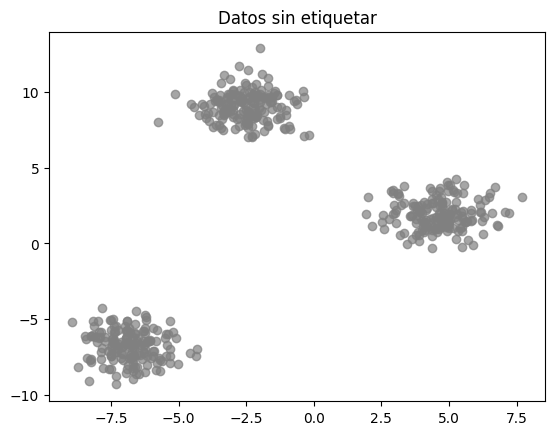

In [3]:
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7)
plt.title('Datos sin etiquetar');


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [5]:
from sklearn.metrics import silhouette_score

print('kmeans.labels_', kmeans.labels_[:10])
print('kmeans.cluster_centers_', kmeans.cluster_centers_) # centroides
print('kmeans.inertia_', kmeans.inertia_)
print('silhouette_score', silhouette_score(X, kmeans.labels_))

kmeans.labels_ [1 0 0 2 0 0 1 0 0 1]
kmeans.cluster_centers_ [[ 4.61416263  1.93184055]
 [-6.83120002 -6.75657544]
 [-2.51336974  9.03492867]]
kmeans.inertia_ 955.6493433489619
silhouette_score 0.8437565906781406


* cluster_centers_
    * Contiene las coordenadas de los centroides finales de cada uno de los clusters.
    * Muestra el punto medio de cada cluster en el espacio de características.
    * Si tienes datos en 2D, este atributo dará un array con la posición (x, y) de cada centroide.

* labels_
    * Es un array que indica a qué cluster pertenece cada muestra de los datos de entrada.
    * Permite identificar cómo se agruparon los datos originales, asignando un número de cluster a cada punto.

* inertia_
    * Es la suma de las distancias cuadradas mínimas entre cada punto y su centroide asignado.
    * Mide qué tan bien están agrupados los puntos alrededor de sus centroides.
    * Un valor bajo de inertia indica que los puntos están cerca de sus centroides, lo que sugiere que los clusters están bien formados y compactos.
    * Un valor alto de inertia indica que los puntos están dispersos o mal agrupados.

* feature_names_in_
    * Contiene los nombres de las características si los datos de entrada eran un DataFrame de Pandas.

* silhouette_score
    * Mide qué tan similar es un punto a los puntos de su cluster comparado con otros clusters.
    * Toma valores entre -1 y 1, mientras más cercano a uno, mejor está definido el cluster.

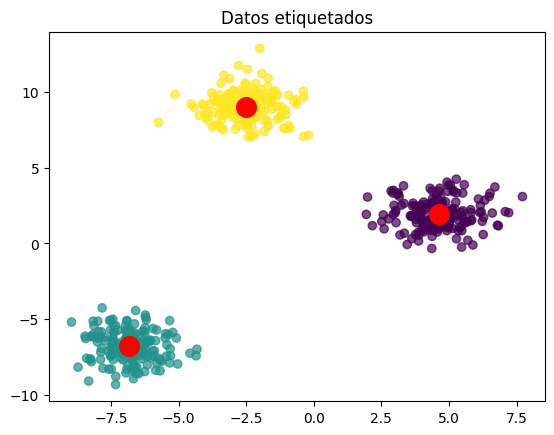

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200)
plt.title('Datos etiquetados');

Text(0.5, 1.0, 'Conteo de clusters')

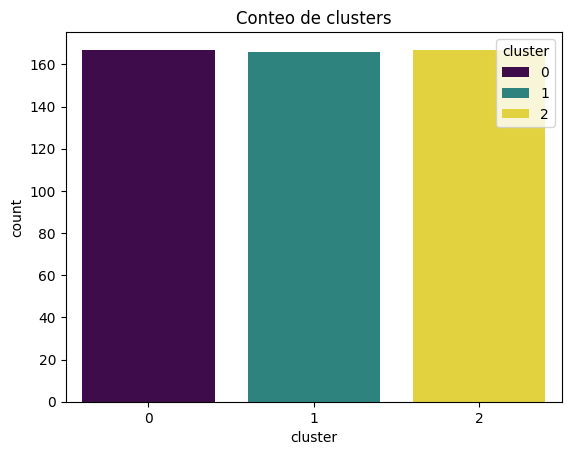

In [7]:
# countplot de los clusters
df_labels = pd.DataFrame({'cluster': kmeans.labels_})
sns.countplot(df_labels, x='cluster', palette='viridis', hue='cluster')
plt.title('Conteo de clusters')

In [8]:
from sklearn.metrics import accuracy_score, classification_report
# probar ????

# accuracy_score(y, kmeans.labels_)
print(classification_report(y, df_labels['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     167.0
           1       0.00      0.00      0.00     167.0
           2       0.00      0.00      0.00     166.0

    accuracy                           0.00     500.0
   macro avg       0.00      0.00      0.00     500.0
weighted avg       0.00      0.00      0.00     500.0



## Elección del número óptimo K o n_clusters

En muchos casos, $K$ no se conoce de antemano. Algunas estrategias para elegir $K$ son:

1. **Método del codo (Elbow method)**:  
   - Se calcula la inercia (suma de distancias al centro) para diferentes valores de $K$.
   - Se observa la gráfica de la inercia vs. $K$.
   - Se escoge el $K$ en el que la inercia deja de decrecer rápidamente y empieza a “aplanarse” (punto de codo).

2. **Coeficiente de silhouette**:  
   - Es una métrica que mide qué tan similar es un punto a los puntos de su cluster comparado con otros clusters.
   - Toma valores entre -1 y 1, mientras más cercano a 1, mejor definido está el cluster.

3. **Métodos de validación estadística** (Calinski-Harabasz, Davies-Bouldin, etc.):  
   - Son métricas específicas para evaluar la calidad de un agrupamiento

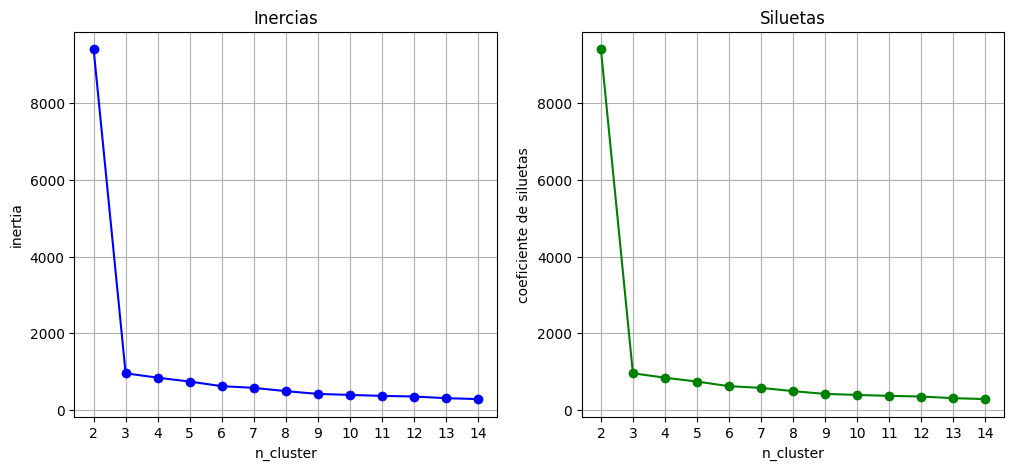

In [10]:
inertias = []
siluetas = []
k_range = range(2,15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    siluetas.append(silhouette_score(X, kmeans.labels_))
    
plt.figure(figsize=(12,5))   
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', color='blue')   
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.title('Inercias')
plt.xticks(k_range)
plt.grid(True)
 
plt.subplot(1, 2, 2)
plt.plot(k_range, inertias, marker='o', color='green')   
plt.xlabel('n_cluster')
plt.ylabel('coeficiente de siluetas')
plt.title('Siluetas')
plt.xticks(k_range)
plt.grid(True);

Método del codo (inertia): 

* En el gráfico de la izquierda, la inertia muestra una gran disminución hasta k=3, donde el descenso se ralentiza. Este es el punto del "codo" y sugiere que 3 podría ser un buen número de clusters según esta métrica.

Coeficiente de silueta: 

* En el gráfico de la derecha, el coeficiente de silueta alcanza su valor máximo en k=3 y comienza a disminuir a partir de ese punto.

* Esto refuerza la idea de que k=3 es un número óptimo de clusters, ya que es donde los clusters están mejor separados.

### iris


K-Means (Iris) -> Inercia: 78.86
K-Means (Iris) -> Coeficiente de Silueta: 0.55


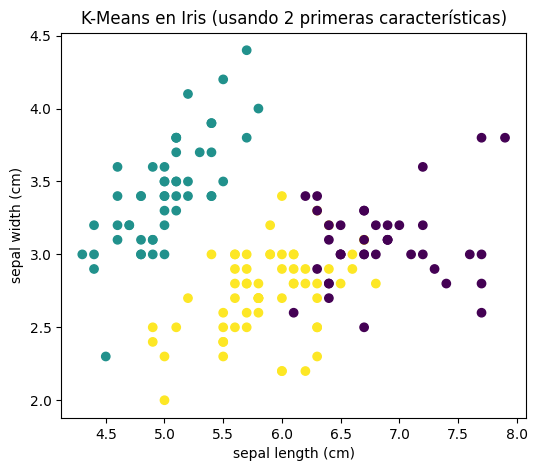

In [14]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

iris = load_iris()
X_iris = iris.data 
y_iris_true = iris.target  # Etiquetas reales (Setosa, Versicolor, Virginica)
feature_names = iris.feature_names

# scaler = RobustScaler()
# X_iris = scaler.fit_transform(X_iris)

kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_iris.fit(X_iris)

labels_kmeans_iris = kmeans_iris.labels_
inertia_kmeans_iris = kmeans_iris.inertia_
silhouette_kmeans_iris = silhouette_score(X_iris, labels_kmeans_iris)

print(f"K-Means (Iris) -> Inercia: {inertia_kmeans_iris:.2f}")
print(f"K-Means (Iris) -> Coeficiente de Silueta: {silhouette_kmeans_iris:.2f}")

plt.figure(figsize=(6, 5))
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_kmeans_iris, cmap='viridis')
plt.title("K-Means en Iris (usando 2 primeras características)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

In [12]:
print(classification_report(y_iris_true, kmeans_iris.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



In [13]:
import numpy as np 

unique_labels = set(dbscan.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(5, 5))
# Asignamos un color distinto para el cluster -1 (puntos considerados outliers)

for label, col in zip(unique_labels, colors):
    class_member_mask = (dbscan.labels_ == label)
    if label == -1:
        # Color gris para outliers
        col = 'gray'
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                c=[col], s=30, label=f"Cluster {label}")
plt.title("Clustering DBSCAN (make_blobs)")
plt.legend()
plt.show()

NameError: name 'dbscan' is not defined

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data  
y_iris_true = iris.target 
feature_names = iris.feature_names
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
dbscan_iris.fit(X_iris)


labels_dbscan_iris = dbscan_iris.labels_
mask_core_iris = labels_dbscan_iris != -1
if np.sum(mask_core_iris) > 1:
    silhouette_dbscan_iris = silhouette_score(X_iris[mask_core_iris], labels_dbscan_iris[mask_core_iris])
    print(f"DBSCAN (Iris) -> Coeficiente de Silueta (núcleos): {silhouette_dbscan_iris:.2f}")
else:
    silhouette_dbscan_iris = None
    print("DBSCAN (Iris) -> No se pudo calcular silueta, pocos puntos en clusters.")

plt.figure(figsize=(6, 5))
unique_labels_iris = set(labels_dbscan_iris)
colors_iris = plt.cm.viridis(np.linspace(0, 1, len(unique_labels_iris)))
for label, col in zip(unique_labels_iris, colors_iris):
    class_member_mask_iris = (labels_dbscan_iris == label)
    if label == -1:
        col = 'gray'
    plt.scatter(X_iris[class_member_mask_iris, 0], X_iris[class_member_mask_iris, 1], 
                c=[col], s=50, label=f"Cluster {label}")
plt.title("DBSCAN en Iris (2 primeras características)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])


NameError: name 'silhouette_score' is not defined

labels [1 2 2 0 2 2 1 2 2 1]
siluetas 0.9844178562232777


Text(0.5, 1.0, 'Datos etiquetados por AgglomerativeClustering')

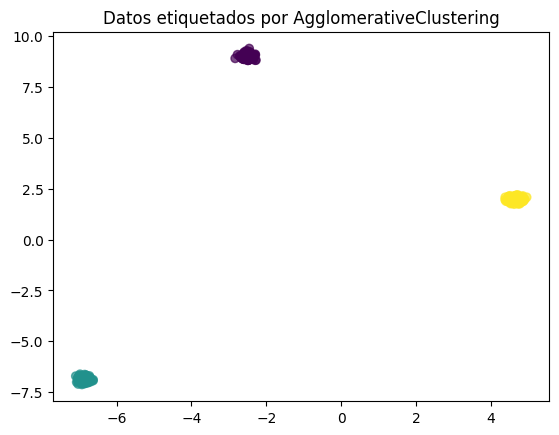

In [18]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=0.1)

clusterizer = AgglomerativeClustering(n_clusters=3)
clusterizer.fit(X)

print('labels', clusterizer.labels_[:10]) # no tiene inercias 
print('siluetas', silhouette_score(X, clusterizer.labels_))

plt.scatter(X[:, 0], X[:, 1], c=clusterizer.labels_, alpha=0.7, cmap='viridis')
plt.title('Datos etiquetados por AgglomerativeClustering')


## Dendrograma

